In [60]:
# Dependencies and Setup
import hvplot.pandas
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import requests
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

# Import API key
from api_keys import geoapify_key

In [70]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
UFO_data_df = pd.read_csv("../Project_Data/scrubbed.csv")

Nukes_data_df = pd.read_csv("../Project_Data/nuclear_weapon_explosions_1945-1998.csv")

merge_df = pd.merge(UFO_data_df, Nukes_data_df, on='datetime')

# Display sample data
merge_df.head()


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude_x,...,longitude,depth,mb,name,source,Country,max_yield,medium,confirmation,salvo
0,6/15/1966 17:00,monterey bay/fort ord rifle range,ca,NaN,disk,1500,25 minutes,Just before sun down (sun still shinning) hove...,11/1/1998,36.778261,...,-116.2024,0.33,NaN,Double Play,SPRINGER,USA,20.0,Underground,confirmed,0
1,7/1/1978 17:00,mojave,ca,us,sphere,180,@3 min,While building the CHP office in Movaje&#44 Ca...,1/28/1999,35.0525000,...,-139.0000,0.00,NaN,Xanthois,CEA/DAM,France,5.0,Underground,confirmed,0
2,7/15/1968 19:00,marion (silver shell beach),ma,us,other,600,10 mins,When I was 8 years old I saw a grayish blue bo...,5/12/2009,41.7000000,...,-139.0000,0.00,NaN,Castor,CEA/DAM,France,1000.0,Air,confirmed,0
3,7/15/1968 19:00,qui nhon (viet nam),NaN,NaN,light,420,7 min,2 high altitude lights making oblique turns&#4...,11/20/2001,13.782967,...,-139.0000,0.00,NaN,Castor,CEA/DAM,France,1000.0,Air,confirmed,0


In [112]:
%%capture --no-display

# Configure the map plot

map_plot_1 = Nukes_data_df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = 'CartoDark',
    frame_width = 1000,
    frame_height = 500,
    color = 'Country',
    size = 'max_yield',
    scale = 0.2,
    title = 'Global Nuclear Explosions by Country (1945-1988)'
    )

In [113]:
# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (Country,max_yield)

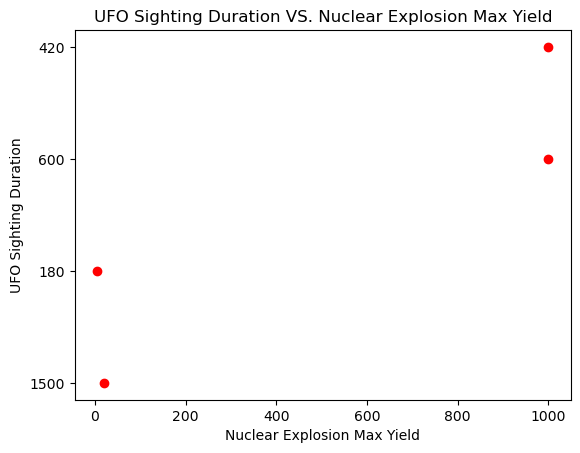

In [114]:
x = merge_df['max_yield']
y = merge_df['duration (seconds)']


plt.scatter(x, y, c='red', cmap='viridis')
plt.title('UFO Sighting Duration VS. Nuclear Explosion Max Yield')
plt.xlabel('Nuclear Explosion Max Yield')
plt.ylabel('UFO Sighting Duration')

plt.show()

In [ ]:
CONCLUSION: Higher the Nuclear Explosion Max Yield, longer the UFO sighting durations reported.